In [2]:
import requests
import os
import pandas as pd
import json 
import csv
import matplotlib.pyplot as plt


cwd = os.getcwd()

pd.set_option('display.max_columns', None)

# Set option to display all rows (or a high number like 500)
pd.set_option('display.max_rows', None)

# Set the maximum width of each single field
pd.set_option('display.max_colwidth', None)

# You can also set the width of the display in characters (if needed)
pd.set_option('display.width', 1000)

In [25]:

data2020 = pd.read_csv('/Users/audreyliang/cs315/CS-315-Final-Project/compiling_data/final_data_by_year/final_result_2020.csv')
data2021 = pd.read_csv('/Users/audreyliang/cs315/CS-315-Final-Project/compiling_data/final_data_by_year/final_result_2021.csv')
data2022 = pd.read_csv('/Users/audreyliang/cs315/CS-315-Final-Project/compiling_data/final_data_by_year/final_result_2022.csv')
data2023 = pd.read_csv('/Users/audreyliang/cs315/CS-315-Final-Project/compiling_data/final_data_by_year/final_result_2023.csv')
data2024 = pd.read_csv('/Users/audreyliang/cs315/CS-315-Final-Project/compiling_data/final_data_by_year/final_result_2024.csv')
df = pd.concat([data2020, data2021, data2022, data2023, data2024], ignore_index=True)


In [26]:

#yearly_averages = df.groupby('year')[['video_duration', 'video_diggcount', 'video_sharecount', 'video_commentcount', 'video_playcount']].mean()
#ads_count_per_year = df[df['video_is_ad']].groupby('year')['video_is_ad'].count()
#total_count_per_year = df.groupby('year')['video_is_ad'].count()
#ads_percentage_per_year = (ads_count_per_year / total_count_per_year)
#yearly_averages['Ads Percentage (%)'] = ads_percentage_per_year.fillna(0)*100
yearly_averages= pd.DataFrame()
verified_count_per_year = df[df['author_verified']].groupby('year')['author_verified'].count()
total = df.groupby('year')['author_verified'].count()
verified_percentage_per_year = (verified_count_per_year / total)
yearly_averages['Verified Account Percentage (%)'] = verified_percentage_per_year * 100
summary_df = yearly_averages

summary_df

import dataframe_image as dfi

# Assuming you have already set display options as described before
# Save the DataFrame as an image
dfi.export(summary_df, '/Users/audreyliang/Downloads/summary_df.png')


In [32]:

verified_counts = df[df['author_verified'] == True].groupby(['search_term', 'year']).size()
total_counts = df.groupby(['search_term', 'year']).size()

verified_percentage = (verified_counts / total_counts) * 100
verified = verified_percentage.reset_index(name='verified_percentage')
verified['year'] = verified['year'].astype(int)
verified.sort_values('verified_percentage', ascending=False, inplace=True)
verified.head()


,search_term,year,verified_percentage
87,Infectious Diseases,2020,74.000000
92,Israel,2023,65.853659
32,Democratic National Committee,2024,64.864865
96,Israeli Defense Forces,2023,63.934426
201,Telemedicine,2020,63.636364


In [33]:

verified_counts = df[df['author_verified'] == True].groupby(['search_term', 'year']).size()
total_counts = df.groupby(['search_term', 'year']).size()

verified_percentage = (verified_counts / total_counts) * 100
verified = verified_percentage.reset_index(name='verified_percentage')
verified['year'] = verified['year'].astype(int)
verified.sort_values('verified_percentage', ascending=True, inplace=True)
verified.head()

,search_term,year,verified_percentage
106,MAGA,2021,2.000000
176,Right-Wing Extremism and Alt-Right,2021,2.000000
16,"Capitol Building (Washington, DC)",2021,2.000000
65,George Floyd Protests (2020),2021,2.040816
140,Political Advertising,2024,3.333333


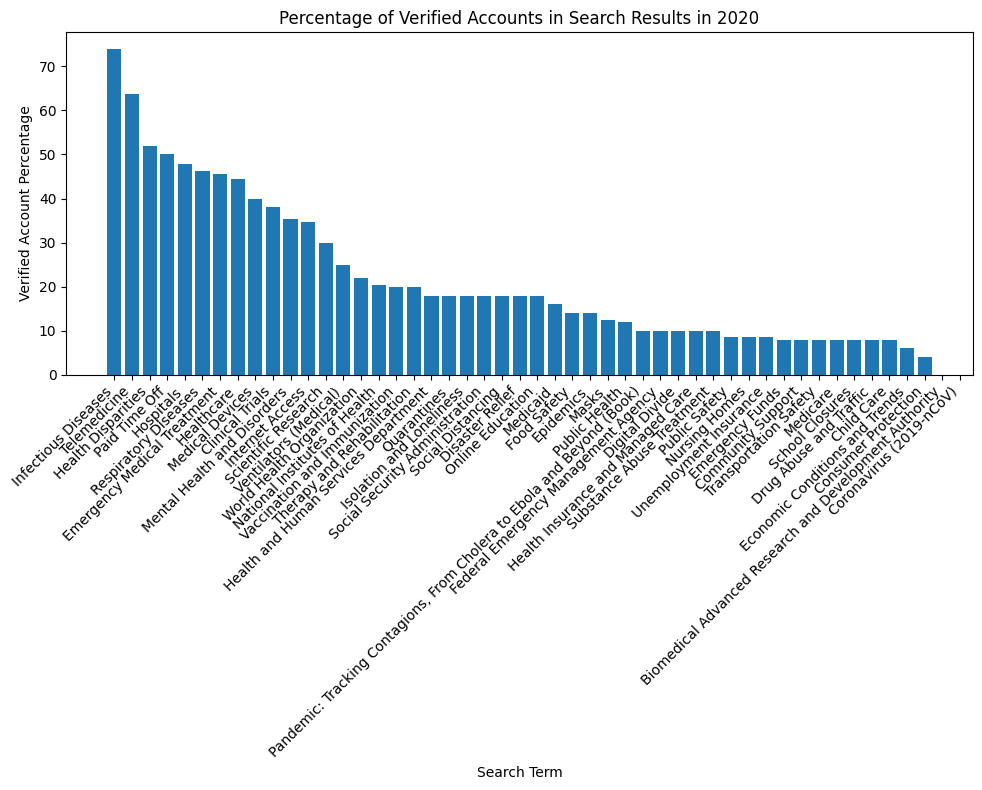

In [83]:

df_2020 = df[df['year'] == 2020]
verified_counts = df_2020[df_2020['author_verified'] == True].groupby('search_term').size()
total_counts = df_2020.groupby('search_term').size()
verified_percentage = (verified_counts / total_counts) * 100
verified_table = verified_percentage.reset_index(name='Verified Percentage').sort_values('Verified Percentage', ascending=False)


plt.figure(figsize=(10, 8))
plt.bar(verified_table['search_term'], verified_table['Verified Percentage'])
plt.title('Percentage of Verified Accounts in Search Results in 2020')
plt.xlabel('Search Term')
plt.ylabel('Verified Account Percentage')
plt.xticks(rotation=45, ha='right') 
plt.tight_layout()  
plt.show()



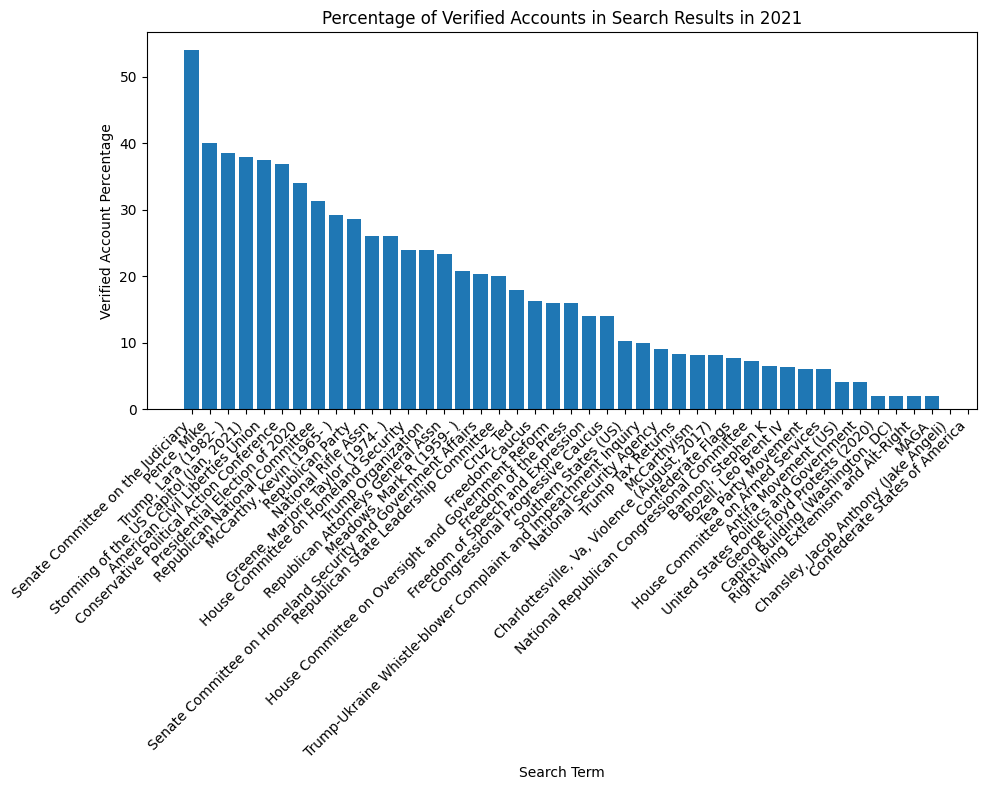

In [84]:
df_2021 = df[df['year'] == 2021]
verified_counts = df_2021[df_2021['author_verified'] == True].groupby('search_term').size()
total_counts = df_2021.groupby('search_term').size()
# Create a table of verified counts
verified_percentage = (verified_counts / total_counts) * 100
verified_table = verified_percentage.reset_index(name='Verified Percentage').sort_values('Verified Percentage', ascending=False)

# Now let's plot the data
plt.figure(figsize=(10, 8))
plt.bar(verified_table['search_term'], verified_table['Verified Percentage'])
plt.title('Percentage of Verified Accounts in Search Results in 2021')
plt.xlabel('Search Term')
plt.ylabel('Verified Account Percentage')
plt.xticks(rotation=45, ha='right')  # Rotate the x-axis labels for better readability
plt.tight_layout()  # Adjust the padding to ensure the x-axis labels are not cut off
plt.show()

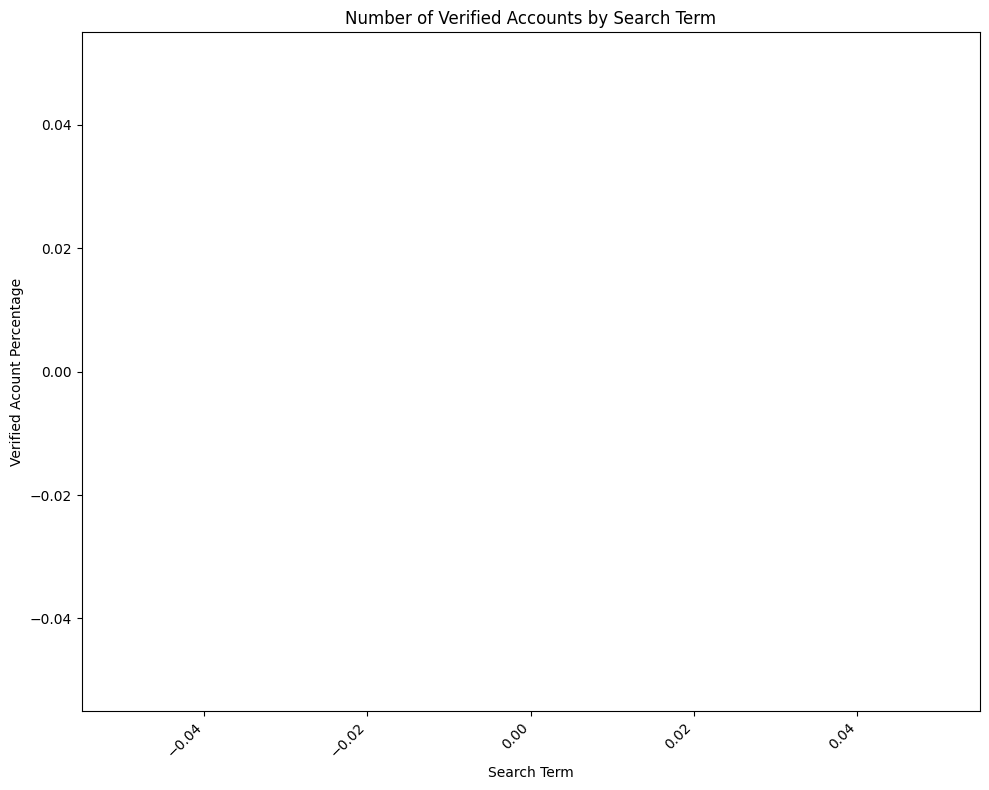

In [28]:
df_2022 = df[df['year'] == 2022]
verified_counts = df_2022[df_2022['author_verified'] == True].groupby('search_term').size()
total_counts = df_2022.groupby('search_term').size()
# Create a table of verified counts
verified_percentage = (verified_counts / total_counts) * 100
verified_table = verified_percentage.reset_index(name='Verified Percentage').sort_values('Verified Percentage', ascending=False)

# Now let's plot the data
plt.figure(figsize=(10, 8))
plt.bar(verified_table['search_term'], verified_table['Verified Percentage'])
plt.title('Number of Verified Accounts by Search Term')
plt.xlabel('Search Term')
plt.ylabel('Verified Acount Percentage')
plt.xticks(rotation=45, ha='right')  # Rotate the x-axis labels for better readability
plt.tight_layout()  # Adjust the padding to ensure the x-axis labels are not cut off
plt.show()

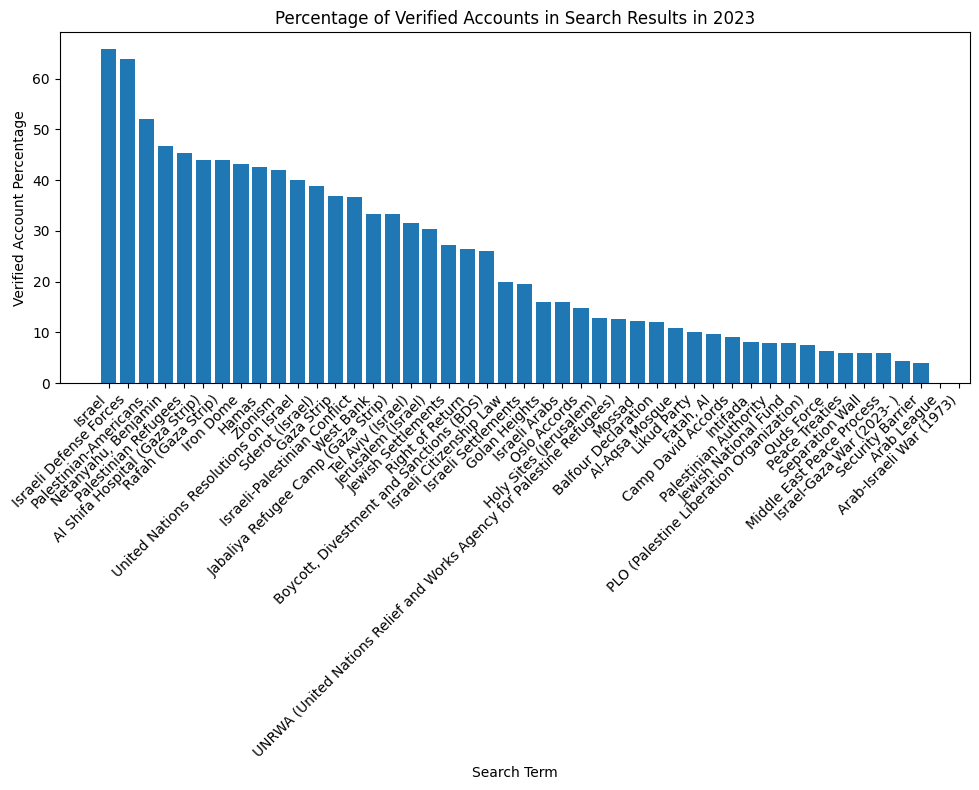

In [29]:
df_2023 = df[df['year'] == 2023]
verified_counts = df_2023[df_2023['author_verified'] == True].groupby('search_term').size()
total_counts = df_2023.groupby('search_term').size()
# Create a table of verified counts
verified_percentage = (verified_counts / total_counts) * 100
verified_table = verified_percentage.reset_index(name='Verified Percentage').sort_values('Verified Percentage', ascending=False)

# Now let's plot the data
plt.figure(figsize=(10, 8))
plt.bar(verified_table['search_term'], verified_table['Verified Percentage'])
plt.title('Percentage of Verified Accounts in Search Results in 2023')
plt.xlabel('Search Term')
plt.ylabel('Verified Account Percentage')
plt.xticks(rotation=45, ha='right')  # Rotate the x-axis labels for better readability
plt.tight_layout()  # Adjust the padding to ensure the x-axis labels are not cut off
plt.show()

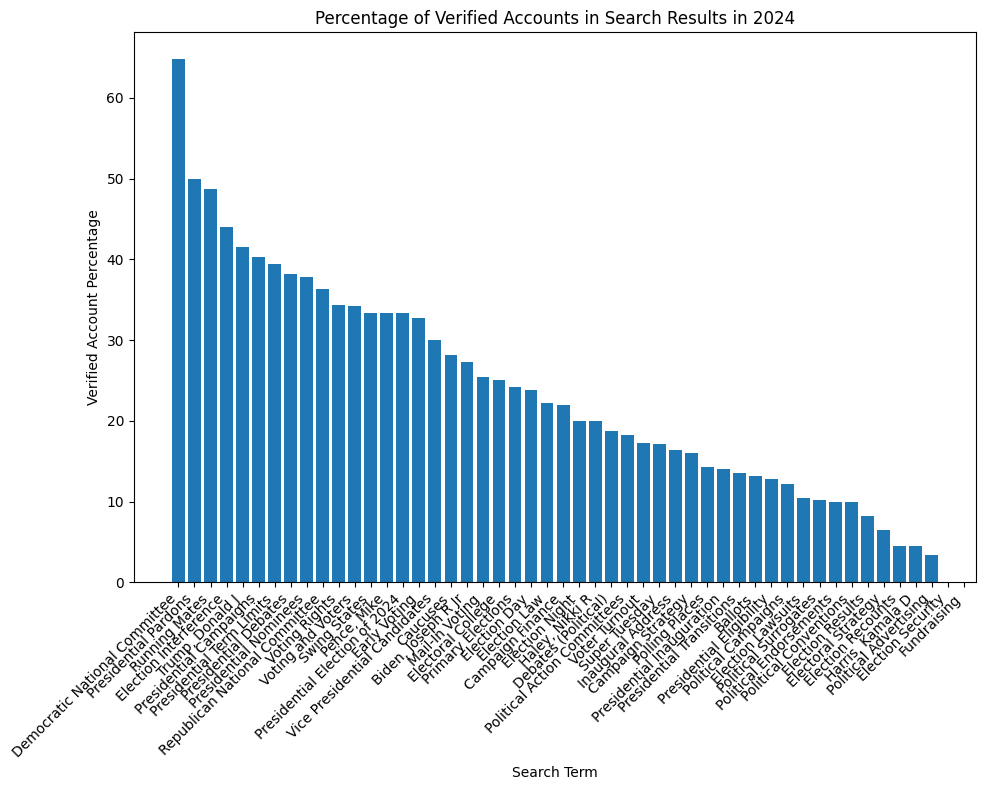

In [90]:
df_2024 = df[df['year'] == 2024]
verified_counts = df_2024[df_2024['author_verified'] == True].groupby('search_term').size()
total_counts = df_2024.groupby('search_term').size()
# Create a table of verified counts
verified_percentage = (verified_counts / total_counts) * 100
verified_table = verified_percentage.reset_index(name='Verified Percentage').sort_values('Verified Percentage', ascending=False)

# Now let's plot the data
plt.figure(figsize=(10, 8))
plt.bar(verified_table['search_term'], verified_table['Verified Percentage'])
plt.title('Percentage of Verified Accounts in Search Results in 2024')
plt.xlabel('Search Term')
plt.ylabel('Verified Account Percentage')
plt.xticks(rotation=45, ha='right')  # Rotate the x-axis labels for better readability
plt.tight_layout()  # Adjust the padding to ensure the x-axis labels are not cut off
plt.show()

In [32]:
#summary table of average verified per year
summary_df

,Verified Account Percentage (%)
year,
2020,17.590361
2021,15.226011
2022,15.702479
2023,19.240416
2024,20.998390


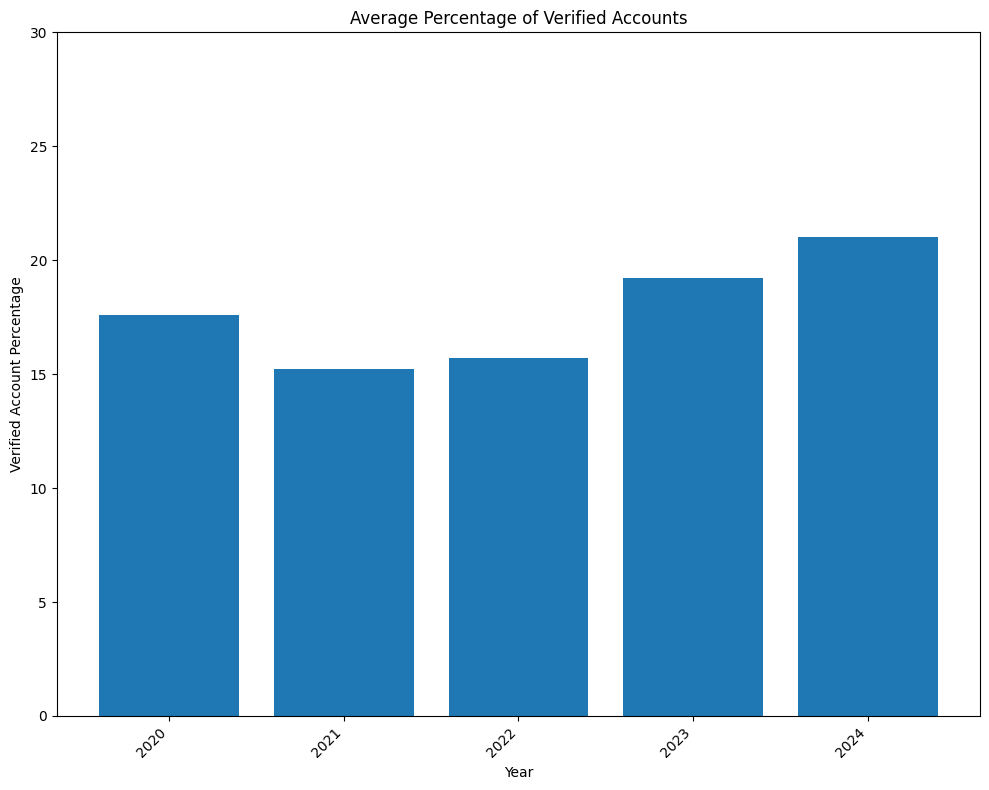

In [33]:
plt.figure(figsize=(10, 8))
plt.bar(summary_df.index, summary_df['Verified Account Percentage (%)']) 
plt.title('Average Percentage of Verified Accounts')
plt.xlabel('Year')
plt.ylabel('Verified Account Percentage')
plt.ylim(0, 30)
plt.xticks(rotation=45, ha='right')  # Rotate the x-axis labels for better readability
plt.tight_layout()  # Adjust the padding to ensure the x-axis labels are not cut off
plt.show()

NameError: name 'year' is not defined